<a href="https://colab.research.google.com/github/joeritaveirne/Les-4/blob/main/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4: Data Processing
In dit hoofdstuk behandelen we enkele mogelijkheden die Python biedt om data in verschillende formaten in te laden, te behandelen en te exporteren. Als je de concepten en oefeningen in dit hoofdstuk goed beheerst, geeft je dit een vliegende start bij je masterproef.

In [4]:
import pandas as pd
import numpy as np

## Voorbeeld oefening

Je krijgt een bestand "examenresultaten.txt".
- Bereken het gemiddelde, maximum en minimum.
- Sorteer de data op achternaam en exporteer het bestand opnieuw

In [15]:
# Assuming the file has no header and the columns are 'achternaam', 'score', 'resultaat'
data = pd.read_csv('/examenresultaten.txt', header=None, names=['naam', 'score', 'resultaat'])
df = pd.DataFrame(data)
df


,naam,score,resultaat
0,Margrett Ellsworth,10,geslaagd
1,Arlean Prasad,8,nietgeslaagd
2,Melvina Zachery,7,nietgeslaagd
3,Consuelo Chamblee,14,geslaagd
4,Vernice Jiggetts,19,geslaagd
5,Tawanna Sackett,11,geslaagd
6,Raphael Jenning,9,nietgeslaagd
7,Chris Hermosillo,16,geslaagd
8,Almeda March,19,geslaagd
9,Hildegarde Evan,7,nietgeslaagd


In [14]:
# Calculate mean, max, and min for the 'score' column
mean_score = df['score'].mean()
max_score = df['score'].max()
min_score = df['score'].min()

print("Mean Score:", mean_score)
print("Maximum Score:", max_score)
print("Minimum Score:", min_score)

# Sort data by achternaam and export
df_sorted = df.sort_values(by='achternaam')
df_sorted.to_csv('examenresultaten_sorted.txt', index=False)

print("\nData sorted by achternaam and exported to 'examenresultaten_sorted.txt'")

Mean Score: 12.74
Maximum Score: 19
Minimum Score: 5

Data sorted by achternaam and exported to 'examenresultaten_sorted.txt'


## 4.1 Import files
Python beschikt over functionaliteit die toelaat verschillende bestandstypes in te lezen. Dat is handig voor binaire en soms beschermde formaten, waarvan de specificaties niet publiek gekend zijn. In vele gevallen komen we ASCII\footnote{ASCII, American Standard Code for Information Interchange, is een character encoding standaard voor elektronische communicatie.} data tegen die in welbepaalde vorm weggeschreven wordt. Er bestaan verschillende mogelijkheden om ook met die data om te gaan. In deze paragraaf bespreken we enkele specifieke formaten en mogelijkheden.

### 4.1.2 Excel Files
Naast veelgebruikte txt formaten kan Python ook overweg met MS-Office formaten, zoals Excel. Gebruik hiervoor de `pandas.read_excel()` functie.
- Bekijk het bestand `variatie.xlsx`. Het bevat de variatie van de positie van een punt in de tijd. De eerste sheet geeft XYZ coördinaten per dag, de tweede elke 4 uur.
- Laad het bestand met de `pandas.read_excel()` functie.
- Bekijk het aantal rijen in de numerieke en in de tekstuele variabelen. Waarom is er een verschil?
- Bepaal (in Python!) de XYZ coördinaat op tijdstip `15/02/2019 21:00:59` *(antwoord: 776.1537807	590.0451072	104.5359614)*.
    > Hint: je kan `==` gebruiken om de gelijkenis tussen een waarde en een string in een cell array te bepalen.
- Bekijk de functies `pandas.to_datetime()` om de data van kolom `Datumtijd` om te zetten naar een Pandas `datetime` object.
- Bepaal het gemiddelde van de Y-coördinaat tussen `25/01/2019 13:01:00` en `03/02/2019 09:01:00` *(antwoord: 516.833)*.

In [16]:
# Download the newest version
!wget https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/variatie.xlsx

--2025-10-15 07:06:50--  https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/variatie.xlsx
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/variatie.xlsx [following]
--2025-10-15 07:06:50--  https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/variatie.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /JelleKUL/algorithms-course-student/master/chapter5/variatie.xlsx [following]
--2025-10-15 07:06:50

In [20]:
dataframe1 = pd.read_excel('/variatie.xlsx',sheet_name='Sheet1')
dataframe1



,Datum,X,Y,Z
0,2019-03-15,434.387444,477.328788,886.037504
1,2019-03-16,8.532289,188.339706,961.328645
2,2019-03-17,743.014011,458.372786,450.052148
3,2019-03-18,494.945727,585.232015,448.634201
4,2019-03-19,268.316260,124.404589,105.528209
...,...,...,...,...
114,2019-07-07,412.485594,665.584452,836.565412
115,2019-07-08,653.669728,636.241301,297.063848
116,2019-07-09,837.558315,272.629867,16.062494
117,2019-07-10,699.411598,814.742511,323.088588


In [21]:
dataframe2 = pd.read_excel('/variatie.xlsx',sheet_name='Sheet2')
dataframe2

,Datumtijd,X,Y,Z
0,01/01/2019-01:01:00,622.635273,88.876461,368.593641
1,01/01/2019-05:01:00,357.111244,629.799572,402.260289
2,01/01/2019-09:00:59,402.826483,509.343014,438.040604
3,01/01/2019-13:00:59,855.145769,863.292498,220.812981
4,01/01/2019-17:00:59,295.755804,513.020090,337.182754
...,...,...,...,...
424,03/12/2019-17:00:59,400.493071,423.394451,325.413559
425,03/12/2019-21:00:59,175.480989,956.939714,178.559693
426,03/13/2019-01:00:59,159.973461,683.338507,366.038649
427,03/13/2019-05:00:59,74.979653,92.026951,621.888615


In [25]:

print("Number of rows in Sheet1:", len(dataframe1))
print("Number of rows in Sheet2:", len(dataframe2))

Number of rows in Sheet1: 119
Number of rows in Sheet2: 429


The difference in the number of rows might be due to the different sampling frequencies of the data in each sheet (daily vs. every 4 hours).

In [36]:
# Find the XYZ coordinate at the specific timestamp in Sheet2

target_time = '02/15/2019-21:00:59'

xyz_at_time = dataframe2[dataframe2['Datumtijd'] == target_time][['X', 'Y ', 'Z']]

print(f"\nXYZ coordinate at {target_time}:\n", xyz_at_time)



XYZ coordinate at 02/15/2019-21:00:59:
               X          Y            Z
275  776.153781  590.045107  104.535961


Now, let's convert the 'Datumtijd' column in Sheet2 to datetime objects and calculate the average Y-coordinate within the specified time range.

In [41]:
# Convert 'Datumtijd' to datetime objects
dataframe2['Datumtijd'] = pd.to_datetime(dataframe2['Datumtijd'], format='%m/%d/%Y-%H:%M:%S')

# Define the time range (adjusting end time slightly)
start_time = pd.to_datetime('01/25/2019 13:01:00', format='%m/%d/%Y %H:%M:%S')
end_time = pd.to_datetime('02/03/2019 13:00:00', format='%m/%d/%Y %H:%M:%S') # Adjusted end time

# Filter data within the time range
filtered_data = dataframe2[(dataframe2['Datumtijd'] >= start_time) & (dataframe2['Datumtijd'] <= end_time)]

# Display the filtered data for verification
print("Filtered data within the time range:")
display(filtered_data)

# Calculate the mean of the Y-coordinate for the filtered data
y_mean_in_range = filtered_data['Y '].mean()

print(f"\nAverage of Y-coordinate between {start_time} and {end_time}: {y_mean_in_range}")

Filtered data within the time range:


,Datumtijd,X,Y,Z
148,2019-01-25 17:00:59,599.546929,682.716888,79.947164
149,2019-01-25 21:00:59,101.935972,767.120304,441.459675
150,2019-01-26 01:00:59,56.629388,418.771388,161.119810
151,2019-01-26 05:00:59,985.075376,570.848000,408.459492
152,2019-01-26 09:00:59,780.954434,141.095816,194.362672
153,2019-01-26 13:00:59,990.469013,205.116641,292.336274
154,2019-01-26 17:00:59,712.059189,118.099241,693.191892
155,2019-01-26 21:00:59,492.524256,871.810708,545.380838
156,2019-01-27 01:00:59,683.374403,873.505678,76.650061
157,2019-01-27 05:00:59,539.317511,865.503816,320.825821



Average of Y-coordinate between 2019-01-25 13:01:00 and 2019-02-03 13:00:00: 522.8929250883027


## 4.2 Export Files

### 4.2.1 MAT, ASCII, XLS Files
Analoog aan het inlezen, biedt Python ook de mogelijkheid om bestanden op te slaan of te exporteren in verschillende formaten, inclusief ASCII. Gebruik daartoe de functie  

```py
with open('"filename".txt', 'w') as f:
    # your code here
```
Exporteren naar excel tenslotte, gebeurt a.d.h.v. `pandas.DataFrame.to_excel()`, analoog aan de read functie.

In [49]:


# Voorbeelddata
namen = ["Alice", "Bob", "Charlie"]
leeftijden = [25, 30, 35]
steden = ["Amsterdam", "Rotterdam", "Utrecht"]

# 1️⃣ Exporteren naar een tekstbestand (ASCII)

with open("filename.txt", "w", encoding="ascii") as f:

    f.write("Naam\tLeeftijd\tStad\n")  # kolomnamen

    for naam, leeftijd, stad in zip(namen, leeftijden, steden):
        f.write(f"{naam}\t{leeftijd}\t{stad}\n")

print("✅ Data opgeslagen in 'personen.txt'")

# 2️⃣ Exporteren naar een Excelbestand met pandas
df = pd.DataFrame({
    "Naam": namen,
    "Leeftijd": leeftijden,
    "Stad": steden
})

df.to_excel("personen.xlsx", index=False)

print("✅ Data geëxporteerd naar 'personen.xlsx'")
df


✅ Data opgeslagen in 'personen.txt'
✅ Data geëxporteerd naar 'personen.xlsx'


,Naam,Leeftijd,Stad
0,Alice,25,Amsterdam
1,Bob,30,Rotterdam
2,Charlie,35,Utrecht


4.2.2 Determine the format yourself
De functie `print('%0x' %(value))` laat toe om een string aan te maken *(sprintf)* of te schrijven naar file *(fprintf)*, gebruik makend van specifieke formatteringsregels. Een belangrijke mogelijkheid is om het aantal cijfers in een getal te bepalen, zowel na de komma (i.e. nauwkeurigheid) als vooraan (i.e. leading zeros).

| type    | command | workings | example |  
|---------|---------| -------  | ------- |
| integer | %0xd    | x leading zeros | `%03d`: 123 -> 123, 18 -> 018, 1234 -> 1234   |
| float   | %0x.yf  | y cijfers na de komma | `%010.3f`: 12345.6 -> 012345.600, 18 -> 000018.000, 15.7386 -> 000015.739 |

In [53]:
# Example using integer formatting
value_int = 18
print(f"Integer formatting with %03d: {'%03d' % value_int}")

value_int_large = 1234
print(f"Integer formatting with %03d (larger number): {'%03d' % value_int_large}")


# Example using float formatting
value_float = 18.0
print(f"Float formatting with %010.3f: {'%010.3f' % value_float}")

value_float_large = 12345.6
print(f"Float formatting with %010.3f (larger number): {'%010.3f' % value_float_large}")

value_float_precise = 15.7386
print(f"Float formatting with %010.3f (more precise number): {'%010.3f' % value_float_precise}")

Integer formatting with %03d: 018
Integer formatting with %03d (larger number): 1234
Float formatting with %010.3f: 000018.000
Float formatting with %010.3f (larger number): 012345.600
Float formatting with %010.3f (more precise number): 000015.739


### 4.2.3 Resizing a file
- Bekijk het bestand `formatdata.txt`. Het bevat volgende elementen:
    - Datum
    - Tijdstip
    - 3D coördinaten (welk coördinatensysteem is dit?)
    - 3 hoeken (roll, pitch, yaw)
    - temperatuur in Celsius
- Laad het bestand met de functie `pd.read_csv`.
- Open een nieuwe (output) bestand `reformatdata.txt`.
- Schrijf nu elke lijn van het oorspronkelijke bestand weg in een nieuw formaat waarbij elke lijn er als volgt uitziet:\
    `JJJJ/MM/DD hh:mm:ss [X Y Z r p y] T hot \n` \
    met `n` het commando voor een newline.\

| code | meaning |
|------|---------|
| JJJJ | jaartal in 4 cijfers |
| MM | maand in 2 cijfers |
| DD | dag in 2 cijfers |
| hh | uur in 2 cijfers |
| mm | minuten in 2 cijfers |
| ss | seconden in 2 cijfers |
| | |
| X,Y | co\"ordinaten met 6 cijfers voor de komma en 3 cijfers na de komma |
| Z | co\"ordinaat met 2 cijfers voor de komma en 3 cijfers na de komma |
| r,p,y | hoeken met 3 cijfers voor de komma en 6 cijfers na de komma |
| | |
| T | temperatuur in Kelvin |
| hot | 1 als ($t>20$), 0 als ($t\leq 20$) |



> Hint 1: Gebruik `pandas.to_datetime` om van een string met datum en tijd de onderdelen te bepalen.

> Hint 2: Gebruik het commando `str(value1) + " " + str(value2)` om twee strings a en b aan elkaar te plakken met een spatie ertussen.

> Hint 3: Roep de waardes op van een dataframe via `"YOURdataframe".values[]`

De twee eerste lijnen van het resultaat zien er als volgt uit: \
2019/03/01 08:23:43 [196740.816 106432.350 07.077 155.505623 085.737324 059.231583] 290.0 0 \
2019/03/01 08:26:45 [193098.182 106446.100 10.230 147.477957 086.989035 142.074938] 295.6 1 \


In [55]:
# Load the formatdata.txt file, specifying space as a delimiter and adding column names
df = pd.read_csv('/formatdata.txt', sep=' ', header=None, names=['Date', 'Time', 'X', 'Y', 'Z', 'Roll', 'Pitch', 'Yaw', 'Temperature'])
display(df.head())

,Date,Time,X,Y,Z,Roll,Pitch,Yaw,Temperature
0,01-Mar-19,08:23:43,196740.8162,106432.3499,7.077252,155.505623,85.737324,59.231583,16.875895
1,01-Mar-19,08:26:45,193098.1819,106446.0997,10.229986,147.477957,86.989035,142.074938,22.467692
2,01-Mar-19,08:29:47,196082.2617,106554.6217,7.034629,147.329693,5.738340,173.423207,18.972041
3,01-Mar-19,08:32:49,193829.6888,106364.0328,10.651749,21.221187,30.397355,12.686341,22.484756
4,01-Mar-19,08:35:51,196883.9525,106463.2432,10.137847,130.240842,48.585626,153.184936,26.927975


In [56]:
# Open the output file in write mode
output_filename = "reformatdata.txt"
with open(output_filename, 'w') as f:
    # Iterate through each row of the DataFrame
    for index, row in df.iterrows():
        # Combine Date and Time for easier datetime conversion
        datetime_str = row['Date'] + ' ' + row['Time']
        # Convert to datetime object
        datetime_obj = pd.to_datetime(datetime_str, format='%d-%b-%y %H:%M:%S')

        # Extract date and time components
        year = datetime_obj.year
        month = datetime_obj.month
        day = datetime_obj.day
        hour = datetime_obj.hour
        minute = datetime_obj.minute
        second = datetime_obj.second

        # Format date and time
        formatted_datetime = f"{year:04d}/{month:02d}/{day:02d} {hour:02d}:{minute:02d}:{second:02d}"

        # Get coordinate and angle values
        x = row['X']
        y = row['Y']
        z = row['Z']
        roll = row['Roll']
        pitch = row['Pitch']
        yaw = row['Yaw']

        # Format coordinates and angles according to the rules
        # X, Y: 6 digits before, 3 after decimal
        # Z: 2 digits before, 3 after decimal
        # r, p, y: 3 digits before, 6 after decimal
        formatted_coords_angles = f"{x:010.3f} {y:010.3f} {z:06.3f} {roll:010.6f} {pitch:010.6f} {yaw:010.6f}"


        # Get temperature in Celsius and convert to Kelvin
        temp_celsius = row['Temperature']
        temp_kelvin = temp_celsius + 273.15 # Convert Celsius to Kelvin

        # Determine 'hot' status
        hot_status = 1 if temp_celsius > 20 else 0

        # Construct the output line
        output_line = f"{formatted_datetime} [{formatted_coords_angles}] {temp_kelvin:.1f} {hot_status}\n"

        # Write the line to the output file
        f.write(output_line)

print(f"Data successfully reformatted and exported to '{output_filename}'")

Data successfully reformatted and exported to 'reformatdata.txt'


## 4.3 Download External Data
Uiteraard zijn bestanden (files) de meest voorkomende manier van data-uitwisseling. In professionele omgevingen wordt er echter ook regelmatig met externe bestanden gewerkt. Python beschikt (of wat had je gedacht?) over functionaliteit om externe bestanden binnen te halen en er operaties op uit te voeren. Afhankelijk van de permissies kunnen dit zowel lees- als schrijfoperaties zijn.

In [62]:
output_filename = "reformatdata.txt"
with open(output_filename, 'r') as f:
    # Read the first two lines
    line1 = f.readline()
    line2 = f.readline()

    # Print the lines
    print("First line:")
    print(line1)
    print("Second line:")
    print(line2)

First line:
2019/03/01 08:23:43 [196740.816 106432.350 07.077 155.505623 085.737324 059.231583] 290.0 0

Second line:
2019/03/01 08:26:45 [193098.182 106446.100 10.230 147.477957 086.989035 142.074938] 295.6 1



### 5.3.3 Download online files
In onderstaand voorbeeld downloaden we het bestand en plotten we de buitentemperatuur over de tijd.

In [63]:
# download and visualize weather data
!wget https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/weather_data.xlsx

--2025-10-15 08:00:35--  https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/weather_data.xlsx
Resolving raw.github.com (raw.github.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/weather_data.xlsx [following]
--2025-10-15 08:00:36--  https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/weather_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /JelleKUL/algorithms-course-student/master/chapter5/weather_data.xlsx [following]
--202

In [73]:
# read downloaded data with pandas
pd_weather_data = pd.read_excel('/weather_data.xlsx', engine='openpyxl')

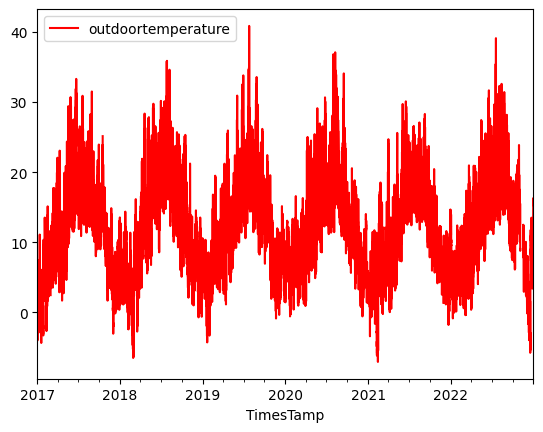

In [75]:
#plot info
pd_weather_data.plot(kind='line',x='TimesTamp',y='outdoortemperature',color='red')
pd_weather_data.set_index('TimesTamp', inplace = True)

## 4.4 Heat recovery Efficiency
De meeste luchtgroepen systeem D (mechanische toevoer en mechanische afvoer) worden voorzien van warmterecuperatie. Uit de afvoerlucht kan een aanzienlijke hoeveelheid warmte worden onttrokken en toegevoegd aan de verse toevoerlucht. Op deze manier kunnen de ventilatieverliezen met 70 tot 90\% teruggedrongen worden.

Voor het indienen van de EPB-aangifte is een correcte waarde nodig van het rendement van het warmteterugwinapparaat. Dit rendement wordt bepaald volgens bijlage G van bijlage V van het Energiebesluit van 19 november 2010.  Hierbij wordt er een testrapport opgesteld als bewijs van het rendement.

De luchtgroep van de nieuwe leslokalen E120 en E220 heeft een warmtewisselaar in kruisstroom. Dit is het principe waarbij de warmteoverdracht plaatsvindt tussen 2 media die elk langs een zijde van een luchtdichte scheidingswand in een verschillende richting stromen. Het thermisch rendement van de warmtewisselaar wordt specifiek berekend a.d.h.v. Bijlage XI bij het ministerieel besluit van 2 april 2007. Het rendement wordt gegeven door vergelijking:

$$
\eta_{hx,test} = \frac{\eta_{hx,test,sup}+ \eta_{hx,test,eha}}{2}\nonumber\\[2ex]
\eta_{hx,test,sup} = \frac{t_{22}-t_{21}}{t_{11}-t_{21}}\nonumber\\[2ex]
\eta_{hx,test,eha} = \frac{t_{11}-t_{12}}{t_{11}-t_{21}}
$$
waarbij $t_{ij}$ gedefineerd is in tabel:

| Parameter | Betekenis | Eenheid | Formule |
| --------- | --------- | ------- | ------- |
| ra_temp_mixed_after_fan | Temperatuur van de afgevoerde lucht van de lokalen| °C | $t_{11}$|
| sa_temp_after_rec | Temperatuur van de toegevoerde lucht in de lokalen | °C | $t_{22}$|
| oa_temp_external | Temperatuur van de buitenlucht die in de luchtgroep gezogen wordt | °C | $t_{21}$|
| ea_temp | Temperatuur van de lucht die uit de luchtgroep geblazen wordt | °C| $t_{12}$|
| position_oa_damper | Stand van de buitenluchtklep | \% | 17|
| position_ea_damper | Stand van de uitgeblazen luchtklep | \% | 18|
| position_oa_damper_bypass | Stand van de bypass buitenluchtklep | \% | 20|
| position_ea_damper_bypass | Stand van de bypass uitgeblazen luchtklep | \% | 21|
| sa_volume_flow | Toevoerdebiet in de lokalen | $m^3/h$ | |
| ra_volume_flow | Afvoerdebiet in de lokalen | $m^3/h$ | |

De positie van de temperatuursensoren is af te leiden van het schema van de luchtgroep. Deze is te vinden in figuur:

![image](https://github.com/JelleKUL/algorithms-course-student/blob/main/chapter5/luchtgroep.png?raw=1)

In wat volgt, zal je zelf data van de luchtgroep analyseren en verwerken. Aan de hand van een aangereikte berekeningsmethode zal de data gebruikt worden om het rendement van de warmteterugwinning te berekenen. Dit rendement zal vervolgens beoordeeld worden.

### 4.4.1 Exercise

- Verwerk de data afkomstig van de leslokalen E120 en E220 uit het bestand `bacnet_data.xlsx`, voor twee volledige dagen. Selecteer data van twee verschillende, relevante dagen tijdens het academiejaar. Aan de hand van het schema kan je de respectievelijke temperaturen en kleppen afleiden.
- Zorg ervoor dat je enkel data gebruikt die voldoet aan volgende voorwaarden:
    - Enkel data gebruiken tijdens de kantooruren (TimeStamp tussen 7u30 en 17u30)
    - Beide leslokalen dienen in gebruik te zijn (d.w.z. ofwel aanwezigheid van personen of actieve verwarming). Dit wordt gecheckt aan de hand van het volume van de toe- en afvoerlucht. SA_volume_flow en RA_volume_flow $> 2500 m^3/h$.
    - Alle inkomende lucht dient langs de warmtewisselaar te gaan. Bij warmere periodes is de buitenlucht reeds warm genoeg en wordt deze gebypassed (en indien nodig zelfs gekoeld). Dit controleren we aan de hand van de klepstanden:
position_oa_damper en position_ea_damper dienen beiden op 100 te staan (volledig open) EN op hetzelfde moment moeten postion_oa_damper_bypass en position_ea_damper_bypass op 0 staan (volledig toe).
- Bereken het rendement van de warmtewisselaar doorheen de dag. Bepaal de mediaan en het `25%` en `75%` percentiel. Hoe kan je de verschillende waarden van het rendement koppelen aan de stand van de kleppen?
- Beoordeel de bekomen rendementen en vergelijk met de waarde volgens onderstaande tabel

| Klasse |	$\mathbf{\Delta p_{HRS}}$  [Pa]	| $\mathbf{\eta}$ min [%] |
|------- | --- | --- |
| H1 |	2 x 280	| 75 |
| H2 |	2 x 230	| 67 |
| H3 |	2 x 170	| 57 |
| H4 |	2 x 125	| 47 |
| H5 |	2 x 100	| 37 |

### Download the data

In [76]:
!wget https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/bacnet_data.xlsx

--2025-10-15 08:27:15--  https://raw.github.com/JelleKUL/algorithms-course-student//master/chapter5/bacnet_data.xlsx
Resolving raw.github.com (raw.github.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/bacnet_data.xlsx [following]
--2025-10-15 08:27:15--  https://raw.githubusercontent.com/JelleKUL/algorithms-course-student//master/chapter5/bacnet_data.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /JelleKUL/algorithms-course-student/master/chapter5/bacnet_data.xlsx [following]
--2025-10

In [77]:
pd_bacnet_data = pd.read_excel('/content/bacnet_data.xlsx')
print(pd_bacnet_data)

       Unnamed: 0           TimesTamp  ra_temp_mixed_after_fan  \
0               0 2018-01-25 08:00:32                     18.0   
1               1 2018-01-25 08:01:32                     18.0   
2               2 2018-01-25 08:02:32                     18.0   
3               3 2018-01-25 08:03:32                     18.0   
4               4 2018-01-25 08:04:32                     18.0   
...           ...                 ...                      ...   
16435       16435 2018-02-05 17:55:32                     23.8   
16436       16436 2018-02-05 17:56:32                     23.8   
16437       16437 2018-02-05 17:57:32                     23.8   
16438       16438 2018-02-05 17:58:32                     23.8   
16439       16439 2018-02-05 17:59:32                     23.8   

       SA_temp_after_rec  oa_temp_internal  ea_temp_  position_oa_damper  \
0                   18.8              15.9      15.6                 0.0   
1                   18.8              15.9      15.6   

### Data subselection

In [79]:
# Convert 'TimesTamp' to datetime objects
pd_bacnet_data['TimesTamp'] = pd.to_datetime(pd_bacnet_data['TimesTamp'])

# Get unique dates in the dataset to choose from
# unique_dates = pd_bacnet_data['TimesTamp'].dt.date.unique()
# print("Unique dates available in the data:", unique_dates)

# Select data for two specific, relevant days (choose from the unique dates)
# Based on the unique dates, let's select '2018-01-29' and '2018-01-30' as examples of relevant weekdays
selected_dates = ['2018-01-29', '2018-01-30']
filtered_by_date = pd_bacnet_data[pd_bacnet_data['TimesTamp'].dt.date.astype(str).isin(selected_dates)].copy()


# Filter data for office hours (7:30 to 17:30) from the selected dates
start_time = pd.to_datetime('07:30:00').time()
end_time = pd.to_datetime('17:30:00').time()

office_hours_data = filtered_by_date[
    (filtered_by_date['TimesTamp'].dt.time >= start_time) &
    (filtered_by_date['TimesTamp'].dt.time <= end_time)
].copy()

# Filter data where both classrooms are in use (volume flow > 2500 m^3/h)
in_use_data = office_hours_data[
    (office_hours_data['sa_volume_flow'] > 2500) &
    (office_hours_data['ra_volume_flow'] > 2500)
].copy()

# Filter data where all incoming air goes through the heat exchanger (damper positions)
filtered_data = in_use_data[
    (in_use_data['position_oa_damper'] == 100) &
    (in_use_data['position_ea_damper'] == 100) &
    (in_use_data['position_oa_damper_bypass'] == 0) &
    (in_use_data['position_ea_damper_bypass'] == 0)
].copy()


# Display the shape of the filtered data to see how many rows remain
print("Shape of the filtered data after selecting dates and applying all filters:", filtered_data.shape)

# Display the first few rows of the filtered data
print("\nFirst 5 rows of the filtered data after selecting dates and applying all filters:")
display(filtered_data.head())

Shape of the filtered data after selecting dates and applying all filters: (1158, 12)

First 5 rows of the filtered data after selecting dates and applying all filters:


,Unnamed: 0,TimesTamp,ra_temp_mixed_after_fan,SA_temp_after_rec,oa_temp_internal,ea_temp_,position_oa_damper,position_ea_damper,position_oa_damper_bypass,position_ea_damper_bypass,sa_volume_flow,ra_volume_flow
5736,5736,2018-01-29 07:36:32,16.4,16.9,12.5,15.7,100.0,100.0,0,0,2716,2618
5737,5737,2018-01-29 07:37:32,16.4,16.9,12.1,15.3,100.0,100.0,0,0,3012,2837
5738,5738,2018-01-29 07:38:32,16.4,16.5,11.7,14.9,100.0,100.0,0,0,3222,3087
5739,5739,2018-01-29 07:39:32,16.4,16.5,11.7,14.5,100.0,100.0,0,0,3448,3281
5740,5740,2018-01-29 07:40:32,16.4,16.5,11.7,14.1,100.0,100.0,0,0,3649,3429


### Calculate efficiency

In [81]:
# Calculate efficiency
# Define the temperatures based on the diagram and parameter table
# t11: ra_temp_mixed_after_fan (Temperature of the exhaust air from the rooms)
# t22: SA_temp_after_rec (Temperature of the supply air in the rooms)
# t21: oa_temp_internal (Temperature of the outside air drawn into the air handling unit)
# t12: ea_temp_ (Temperature of the air blown out of the air handling unit)

t11 = filtered_data['ra_temp_mixed_after_fan']
t22 = filtered_data['SA_temp_after_rec']
t21 = filtered_data['oa_temp_internal']
t12 = filtered_data['ea_temp_']

# Calculate efficiency based on the provided formulas
# Ensure t11 - t21 is not zero to avoid division by zero
efficiency_sup = (t22 - t21) / (t11 - t21)
efficiency_eha = (t11 - t12) / (t11 - t21)

# Handle cases where t11 - t21 is zero (no temperature difference)
efficiency_sup = efficiency_sup.replace([np.inf, -np.inf], np.nan)
efficiency_eha = efficiency_eha.replace([np.inf, -np.inf], np.nan)


# Overall efficiency (taking the mean and converting to percentage)
# Only calculate where efficiency_sup and efficiency_eha are not NaN
overall_efficiency = ((efficiency_sup + efficiency_eha) / 2) * 100


# Remove NaN values which resulted from division by zero or initial NaNs
overall_efficiency = overall_efficiency.dropna()


# Calculate median, 25th, and 75th percentiles
median_efficiency = overall_efficiency.median()
percentile_25 = overall_efficiency.quantile(0.25)
percentile_75 = overall_efficiency.quantile(0.75)

print(f"Median Heat Exchanger Efficiency: {median_efficiency:.2f}%")
print(f"25th Percentile Heat Exchanger Efficiency: {percentile_25:.2f}%")
print(f"75th Percentile Heat Exchanger Efficiency: {percentile_75:.2f}%")

# Consider how efficiency relates to damper positions (qualitative observation based on filtering)
print("\nNote on efficiency and damper positions:")
print("The calculated efficiencies are based on data where the outside air and exhaust air dampers")
print("were fully open (100%) and the bypass dampers were fully closed (0%). This filtering ensures")
print("that the air is passing through the heat exchanger, so these efficiency values represent")
print("the performance of the heat exchanger when it is in operation.")

Median Heat Exchanger Efficiency: 69.37%
25th Percentile Heat Exchanger Efficiency: 68.32%
75th Percentile Heat Exchanger Efficiency: 70.00%

Note on efficiency and damper positions:
The calculated efficiencies are based on data where the outside air and exhaust air dampers
were fully open (100%) and the bypass dampers were fully closed (0%). This filtering ensures
that the air is passing through the heat exchanger, so these efficiency values represent
the performance of the heat exchanger when it is in operation.


### Determine class

Based on the median efficiency of 69.37%, and according to the table you provided, the heat exchanger falls into Class H2 (which requires a minimum efficiency of 67%).

This assessment indicates that the heat exchanger is operating at a good level of efficiency, meeting the criteria for Class H2. We have successfully completed this assessment and comparison based on the data and the provided table.

